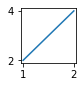

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(1,1))

plt.plot([1,2],[2,4])
plt.show()

In [2]:
# Now import everything else
import numpy as np
import pylab
import time
import scipy
from scipy.interpolate import interp2d

# Camera Object

In [3]:
# Make a camera object
#from CamFLIR import CamFLIR
import imp
import CamHamThread
imp.reload(CamHamThread)
#del(CamHamThread)
from CamHamThread import CamHamThread
cam=CamHamThread(exposure=0.3,SensitivityGain=1,CCDMode="EMCCD")


In [16]:
#This is how you
#take a photo

img=cam.SnapOne()



In [4]:
print(5)

5


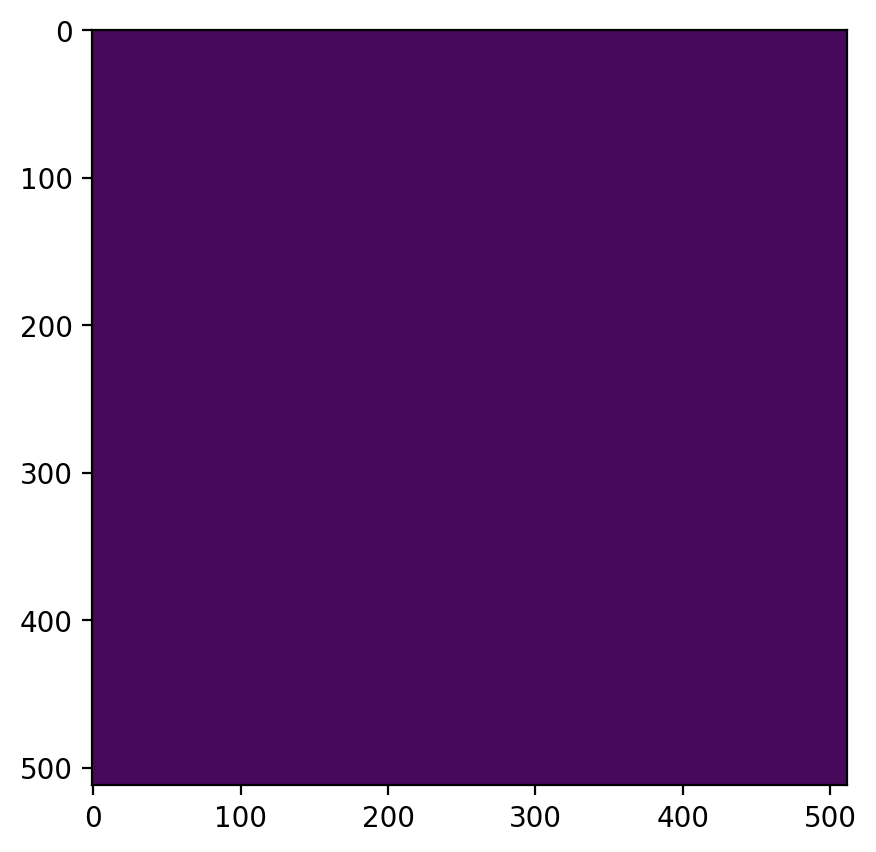

In [5]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img,clim=(200,70000))

# Stage Object

In [4]:
#Initiate a stage object
#import imp
#import Stage
#imp.reload(Stage)
from Stage import Stage
stg=Stage()

In [5]:
stg.MoveToX(-.74)
stg.MoveToY(1)
stg.MoveToZ(3.7159)
#stg.MoveToZ(3.707993)

In [6]:
FocalPoints=[]
def RecordFocus():
    FocalPoints.append([stg.X,stg.Y,stg.Z])
    print(FocalPoints)

In [4]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 0 3.35


In [28]:
RecordFocus()

[[-1, 1.5, 3.5887755102040817]]


In [4]:
FocalPoints=np.loadtxt("./FocalPlane.txt")
FocalPoints=np.array(FocalPoints)
stg.DefineFocalPlane(FocalPoints)

NameError: name 'np' is not defined

In [4]:
stg.MoveToX(-3.9)
stg.MoveToY(1)
stg.MoveToZ(3.5)
print([stg.X,stg.Y,stg.Z])

[-3.9, 1, 3.5]


In [40]:
#stg.MoveToZ(3.3925)
stg.MoveToY(5)

In [19]:
stg.MoveToZ(-6) 

In [4]:
#Move in X and into focus
#time.sleep(5)
stg.MoveToX(-2)
stg.MoveToY(6)
stg.MoveToZ(3.559)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  -2 6 3.559


In [144]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  -0.9 -1.6 3.522


In [1]:
stg.MoveToY(-1.7)

NameError: name 'stg' is not defined

In [149]:
stg.MoveToZ(3.521)

In [48]:
def BigImageSweep(xmin,xmax,xstep,ymin,ymax,ystep):
    xs= np.arange(xmin,xmax,xstep)
    ys= np.arange(ymin,ymax,ystep)
    fig=plt.figure(figsize=(8,8),dpi=150)
    gs = fig.add_gridspec(len(xs), len(ys), hspace=0, wspace=0)
    axes= gs.subplots(sharex='col', sharey='row')
    pics={}
    for ix in range(0,len(xs)):
        for iy in range(0,len(ys)):
            x=xs[ix]
            y=ys[iy]
            stg.FocusAt(x,y)
            time.sleep(0.5)
            pics[x,y]=cam.Snap(1)[0]
            axes[ix][iy].imshow(pics[x,y])
    return pics

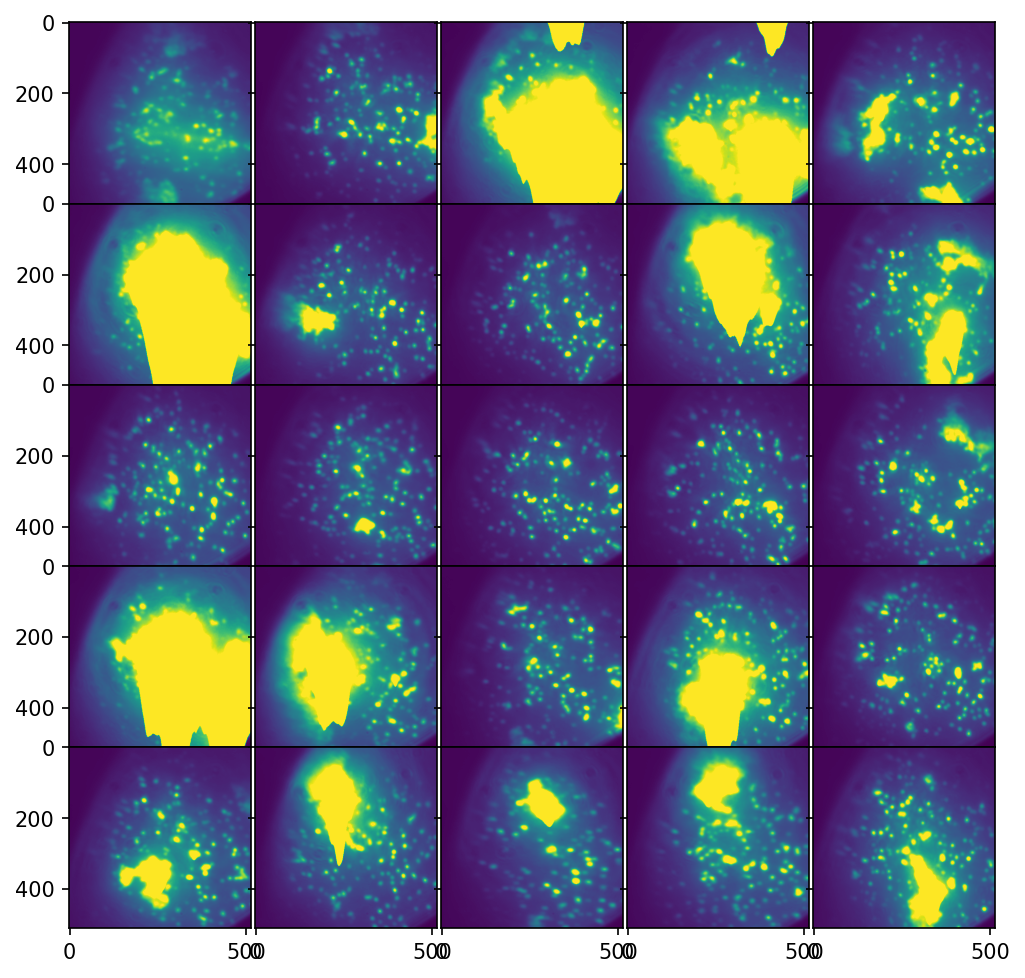

In [49]:
pics=BigImageSweep(0,0.1,0.02,0,0.1,0.02)

In [24]:
def RoughFocus(zmin, zmax,steps=30):
    Intensities=[]
    firstzs=np.linspace(zmin, zmax, steps)
    for z in firstzs:
        stg.MoveToZ(z)
        Intensities.append(sum(sum(cam.Snap(1)[0])))
    maxpos=np.argmax(Intensities)
    if(maxpos==0):
        print("Rough focus failed, max brightness is below lower limit")
        return False
    elif(maxpos==len(firstzs)):
        print("Rough focus failed, max brightness is above upper limit")
        return False
    else:
        Intensities=[]
        secondzs= np.arange(firstzs[maxpos-1], firstzs[maxpos+1],steps)
        for z in secondzs:
            stg.MoveToZ(z)
            Intensities.append(sum(sum(cam.Snap(1)[0])))
        maxpos=np.argmax(Intensities)
        print("Rough focus found at "+str(secondzs[maxpos]))
        return secondzs[maxpos]

In [33]:
x=stg.GetAxes()[0]
y=stg.GetAxes()[1]
z=stg.GetAxes()[2]

In [60]:
x.SVO(x.axes,values=True)
y.SVO(y.axes,values=True)
z.SVO(z.axes,values=True)


In [125]:
FocusAt(2.1,0.5)

NameError: name 'FocusAt' is not defined

In [16]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  1.5 0 3.7305263157894735


In [20]:
stg.MoveToZ(3.6)


#### time.sleep(1)
stg.MoveToX(2.5)
stg.MoveToY(0.0)
stg.MoveToZ(3.414)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

In [5]:
time.sleep(1)
stg.MoveToX(0)
stg.MoveToY(0.2)
stg.MoveToZ(3.414)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 0.2 3.414


###### Scan Example

In [13]:
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        #pics.append(cam.Snap(1)[0])
        print(Zs[i])
        time.sleep(1)

    return pics

In [14]:
Zs=np.linspace(3.68,3.72,20)
pics=MakeImageSweep(Zs,showthem=True)

3.68
3.682105263157895
3.68421052631579
3.686315789473684
3.688421052631579
3.690526315789474
3.6926315789473687
3.6947368421052635
3.696842105263158
3.6989473684210528
3.7010526315789476
3.7031578947368424
3.705263157894737
3.7073684210526316
3.7094736842105265
3.7115789473684213
3.713684210526316
3.7157894736842105
3.7178947368421054
3.72


# Autofocus using Convolution only

In [8]:
import AFonSingles
from AFonSingles import AFonSingles
focussingles = AFonSingles(cam)

print("Starting Convolution")

finalstartsweep = 3.5
finalendsweep = 3.6

print ("Convolution Round starting Z val: ",finalstartsweep)
print ("Convolution Round ending Z val: ", finalendsweep)

Zs4=np.linspace(finalstartsweep,finalendsweep,numSweepsConvolution)
zVals, pics= focussingles.MakeImageSweepForAF(Zs4, stg)

#now that zsweep is done and images are saved do AF thing to find most in focus
#returns the value of the z coordinate most in focus

zValinFocus = focussingles.main(pics, zVals)

print("In Focus Value: ", zValinFocus)

#move stage to the in focus place
stg.MoveToZ(zValinFocus)

Starting Convolution
Convolution Round starting Z val:  3.5
Convolution Round ending Z val:  3.6
3.5
3.511111111111111
3.522222222222222
3.533333333333333
3.5444444444444443
3.555555555555556
3.566666666666667
3.577777777777778
3.588888888888889
3.6
[0 0 0 0 0 0 0 0 0 0]
In Focus Value:  3.5


# Autofocus using Brightness only (Works well for microspheres)

Starting Z val:  3.4
Ending Z val:  3.8
3.4
3.44
3.48
3.52
3.56
3.5999999999999996
3.6399999999999997
3.6799999999999997
3.7199999999999998
3.76
3.8
Number of images taken in first z-sweep:  11


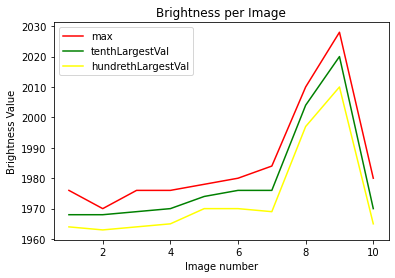

Brightest Z value at:  3.7199999999999998
Image number:  9 out of  11  z-sweeps


In [7]:
#AF funtion, initiate stg and camera object first

import AutoFocusMicroSpheres
from AutoFocusMicroSpheres import AutoFocusMicroSpheres
focus = AutoFocusMicroSpheres(cam)

startsweep = 3.4
endsweep = 3.8

#do one more than what you need because the first image gets 
#intentionally deleted due to brightness caused by moving slide back to a low z value
numSweepsFirstRound = 11


print ("Starting Z val: ",startsweep)
print ("Ending Z val: ", endsweep)

Zs=np.linspace(startsweep,endsweep,numSweepsFirstRound)
autofocusZ=focus.Autofocus(Zs, stg)
Zss=Zs
print("Brightest Z value at: " , Zss[autofocusZ])
print("Image number: ", autofocusZ+1 , "out of ", numSweepsFirstRound, " z-sweeps")

# Full Autofocus

Round one starting Z val:  3.4
Round one ending Z val:  3.8
starting cell
3.4
3.44
3.48
3.52
3.56
3.5999999999999996
3.6399999999999997
3.6799999999999997
3.7199999999999998
3.76
3.8
Number of images taken in first z-sweep:  11


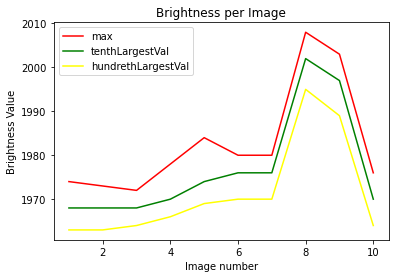

Round 1 Brightest Z value at:  3.6799999999999997
Image number:  8 out of  11  z-sweeps

Starting Final Convolution Round
Convolution Round starting Z val:  3.63
Convolution Round ending Z val:  3.7299999999999995
3.63
3.641111111111111
3.652222222222222
3.663333333333333
3.674444444444444
3.6855555555555553
3.6966666666666663
3.7077777777777774
3.7188888888888885
3.7299999999999995
[0 0 0 0 0 0 0 0 0 0]
Final in Focus Value:  3.63


In [6]:
import CombinedAFMaster
from CombinedAFMaster import CombinedAFMaster
focussingles = CombinedAFMaster(cam, stg)

roundOneStartZVal = 3.4
roundOneEndZVal = 3.8

#do one more than what you need because the first image gets 
#intentionally deleted due to brightness caused by moving slide back to a low z value
numSweepsFirstRound = 31

numSweepsConvolution = 100

focussingles.main(roundOneStartZVal, roundOneEndZVal, numSweepsFirstRound, numSweepsConvolution)

In [7]:
Zs4=np.linspace(3.6,3.7,10)
zVals, pics=MakeImageSweepForAF(Zs4,showthem=True)

#now that zsweep is done and images are saved do AF thing to find most in focus
#returns the value of the z coordinate most in focus

numWhitePixelsArr = []
for image2 in pics:
    #pass the .txt file that cam.snap returns from the made directory
    image = processImage(image2)
    kernel = makekernel()
    output = convolve2D(image, kernel, strides=1)
    pyplot.imsave("onePic.jpg", output, cmap=cm.gray)
    numWhitePixels = threshold('onePic.jpg')
    numWhitePixelsArr.append(numWhitePixels)

numWhitePixelsArr = np.asarray(numWhitePixelsArr)
print(numWhitePixelsArr)
maxValIndex = max_index = np.argmax(numWhitePixelsArr, axis=0)
#the maxvalindex is the index to find in array that saves the z position, return or print that, then go there

zValinFocus = zVals[maxValIndex]

print("Final in Focus Value: ", zValinFocus)


#move stage to the in focus place
stg.MoveToZ(int(zValinFocus))


3.6
3.611111111111111
3.6222222222222222
3.6333333333333333
3.6444444444444444
3.655555555555556
3.666666666666667
3.677777777777778
3.688888888888889
3.7
[0 0 0 0 0 0 0 0 0 0]
Final in Focus Value:  3.6


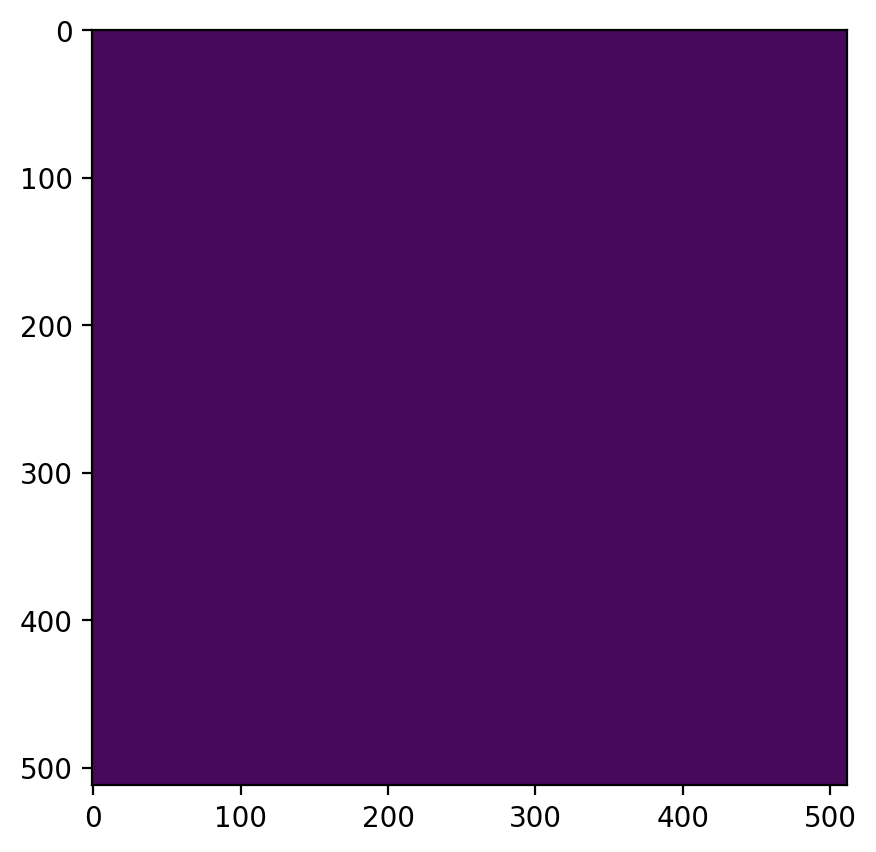

In [9]:

#cam=CamHamThread(exposure=0.3,SensitivityGain=1,CCDMode="EMCCD")
img=cam.SnapOne()
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img,clim=(200,70000))

# Continue original code below this

In [17]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,5000)

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

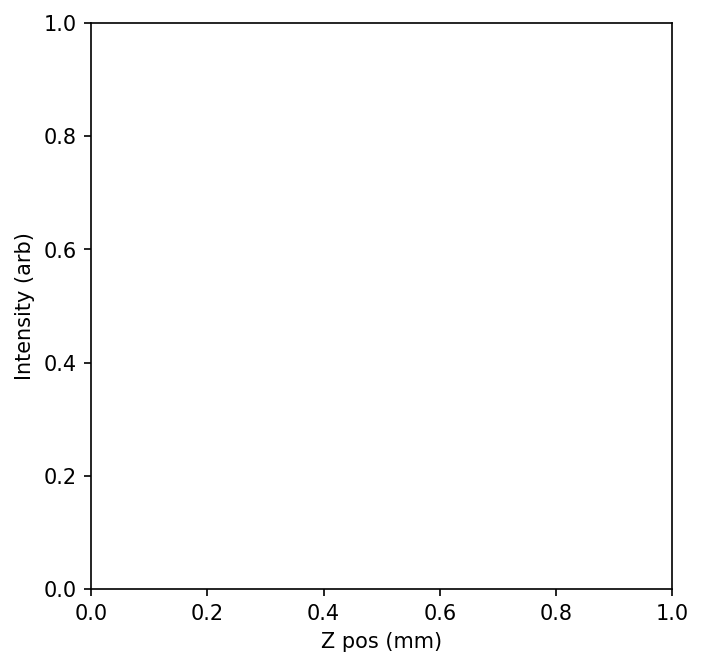

In [18]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)

In [12]:
from scipy import interpolate

In [13]:
interpolate.interp2d?

(3.55, 3.6)

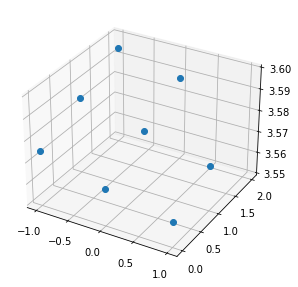

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(FocalPoints[:,0],FocalPoints[:,1],FocalPoints[:,2],'o')
fig.tight_layout()
ax.set_zlim(3.55,3.6)